In [ ]:
# ==============================
# CNN-1D for Regression (VS Code version)
# ==============================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# ==============================
# Check GPU availability
# ==============================
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# ==============================
# Load datasets (local path)
# ==============================
train_df = pd.read_csv(r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/train_ks.csv")
test_df = pd.read_csv(r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/test_ks.csv")

target_column = "Yield"
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values

X_test = test_df.drop(columns=[target_column]).values
y_test = test_df[target_column].values

# ==============================
# Standardize features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for 1D CNN: (samples, timesteps, channels)
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

# ==============================
# Build CNN-1D model
# ==============================
model = Sequential()

# Conv Layer 1
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Conv Layer 2
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten and Dense
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Regression output

# ==============================
# Compile
# ==============================
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ==============================
# Early Stopping
# ==============================
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# ==============================
# Train
# ==============================
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ==============================
# Predictions
# ==============================
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# ==============================
# Evaluation
# ==============================
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true, ddof=1) / rmse
    return r2, rmse, rpd

train_r2, train_rmse, train_rpd = evaluate(y_train, y_pred_train)
test_r2, test_rmse, test_rpd = evaluate(y_test, y_pred_test)

print("\n1D-CNN Model Evaluation:")
print(f"Train R2   : {train_r2:.4f}")
print(f"Test R2    : {test_r2:.4f}")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test RMSE  : {test_rmse:.4f}")
print(f"Train RPD  : {train_rpd:.4f}")
print(f"Test RPD   : {test_rpd:.4f}")


: 

In [1]:
# ==============================
# CNN-1D for Regression (VS Code version)
# ==============================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# ==============================
# Check GPU availability
# ==============================
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# ==============================
# Load datasets (local path)
# ==============================
train_df = pd.read_csv(r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/train_ks.csv")
test_df = pd.read_csv(r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/test_ks.csv")

target_column = "Yield"
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values

X_test = test_df.drop(columns=[target_column]).values
y_test = test_df[target_column].values

# ==============================
# Standardize features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for 1D CNN: (samples, timesteps, channels)
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

# ==============================
# Build CNN-1D model
# ==============================
model = Sequential()

# Conv Layer 1
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Conv Layer 2
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten and Dense
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Regression output

# ==============================
# Compile
# ==============================
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ==============================
# Early Stopping
# ==============================
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# ==============================
# Train
# ==============================
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ==============================
# Predictions
# ==============================
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# ==============================
# Evaluation
# ==============================
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true, ddof=1) / rmse
    return r2, rmse, rpd

train_r2, train_rmse, train_rpd = evaluate(y_train, y_pred_train)
test_r2, test_rmse, test_rpd = evaluate(y_test, y_pred_test)

print("\n1D-CNN Model Evaluation:")
print(f"Train R2   : {train_r2:.4f}")
print(f"Test R2    : {test_r2:.4f}")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test RMSE  : {test_rmse:.4f}")
print(f"Train RPD  : {train_rpd:.4f}")
print(f"Test RPD   : {test_rpd:.4f}")


Num GPUs Available:  0
Epoch 1/20


c:\Users\Abu Jubayer\.conda\envs\tf_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.5708 - mae: 1.9612 - val_loss: 38.3019 - val_mae: 6.1421
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5650 - mae: 0.9960 - val_loss: 104.4435 - val_mae: 10.1783
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.2997 - mae: 0.9050 - val_loss: 168.0945 - val_mae: 12.9214
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1642 - mae: 0.8541 - val_loss: 185.0363 - val_mae: 13.5664
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9659 - mae: 0.7914 - val_loss: 199.9116 - val_mae: 14.0739
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8913 - mae: 0.7521 - val_loss: 197.4369 - val_mae: 13.9641
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8765 - mae: 0.7506 - val_loss: 166.0675 - val_mae: 12.7912
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8625 - mae: 0.7437 - val_loss: 107.0558 - val_mae: 10.2516
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - 

Epoch 1/30


c:\Users\Abu Jubayer\.conda\envs\tf_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.3145 - mae: 1.9767 - val_loss: 55.8458 - val_mae: 7.4424
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5428 - mae: 0.9843 - val_loss: 168.4907 - val_mae: 12.9569
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1929 - mae: 0.8700 - val_loss: 289.8431 - val_mae: 17.0031
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1322 - mae: 0.8527 - val_loss: 400.6610 - val_mae: 19.9891
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9439 - mae: 0.7771 - val_loss: 469.9936 - val_mae: 21.6424
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0169 - mae: 0.7953 - val_loss: 454.6973 - val_mae: 21.2759
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8562 - mae: 0.7467 - val_loss: 378.9208 - val_mae: 19.3944
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8791 - mae: 0.7490 - val_loss: 340.7708 - val_mae: 18.3108
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - 

Model saved as CNN1D_model.h5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

1D-CNN Model Evaluation :
Train R²   : -0.8959
Test R²    : -0.8526
Train RMSE : 0.8002
Test RMSE  : 0.7963
Train RPD  : 0.7264
Test RPD   : 0.7355


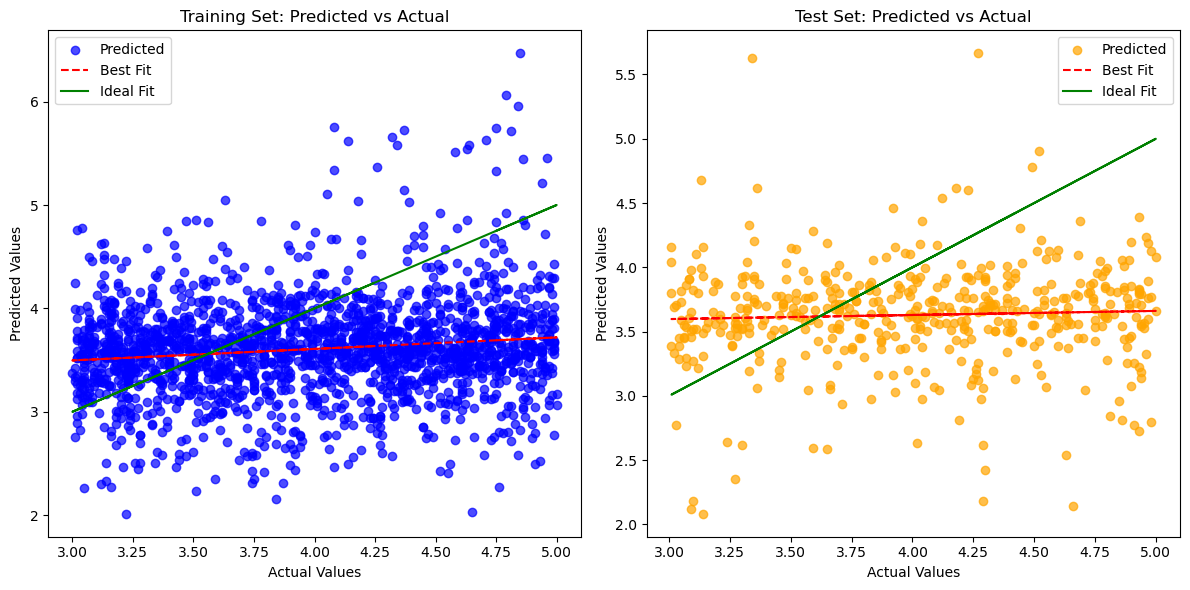

<Figure size 600x600 with 0 Axes>

KeyboardInterrupt: 

In [1]:
# -----------------------------
# CNN-1D Regression with TensorFlow/Keras (VS Code Compatible)
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load CSV files (Manually provide path)
# -----------------------------
train_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/train_ks.csv"
test_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/test_ks.csv"    

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# -----------------------------
# Features and target
# -----------------------------
target_column = "Yield"
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values
X_test = test_df.drop(columns=[target_column]).values
y_test = test_df[target_column].values

# -----------------------------
# Standardize features
# -----------------------------
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape for 1D-CNN input
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

# -----------------------------
# Build 1D-CNN model
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1],1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# -----------------------------
# Compile model
# -----------------------------
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -----------------------------
# EarlyStopping
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# -----------------------------
# Train model
# -----------------------------
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# -----------------------------
# Save model
# -----------------------------
model.save("CNN1D_model.h5")
print("Model saved as CNN1D_model.h5")

# -----------------------------
# Predictions
# -----------------------------
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# -----------------------------
# Evaluation
# -----------------------------
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true, ddof=1) / rmse
    return r2, rmse, rpd

train_r2, train_rmse, train_rpd = evaluate(y_train, y_pred_train)
test_r2, test_rmse, test_rpd = evaluate(y_test, y_pred_test)

print("\n1D-CNN Model Evaluation :")
print(f"Train R²   : {train_r2:.4f}")
print(f"Test R²    : {test_r2:.4f}")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test RMSE  : {test_rmse:.4f}")
print(f"Train RPD  : {train_rpd:.4f}")
print(f"Test RPD   : {test_rpd:.4f}")

# -----------------------------
# Scatter Plot: Train vs Test
# -----------------------------
def plot_train_test(y_train, y_pred_train, y_test, y_pred_test):
    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    # Training Plot
    axes[0].scatter(y_train, y_pred_train, color="blue", alpha=0.7, label="Predicted")
    z_train = np.polyfit(y_train, y_pred_train, 1)
    p_train = np.poly1d(z_train)
    axes[0].plot(y_train, p_train(y_train), "r--", label="Best Fit")
    axes[0].plot(y_train, y_train, "g-", label="Ideal Fit")
    axes[0].set_title("Training Set: Predicted vs Actual")
    axes[0].set_xlabel("Actual Values")
    axes[0].set_ylabel("Predicted Values")
    axes[0].legend()
    axes[0].grid(False)

    # Test Plot
    axes[1].scatter(y_test, y_pred_test, color="orange", alpha=0.7, label="Predicted")
    z_test = np.polyfit(y_test, y_pred_test, 1)
    p_test = np.poly1d(z_test)
    axes[1].plot(y_test, p_test(y_test), "r--", label="Best Fit")
    axes[1].plot(y_test, y_test, "g-", label="Ideal Fit")
    axes[1].set_title("Test Set: Predicted vs Actual")
    axes[1].set_xlabel("Actual Values")
    axes[1].set_ylabel("Predicted Values")
    axes[1].legend()
    axes[1].grid(False)

    plt.tight_layout()
    plt.show()

plot_train_test(y_train, y_pred_train, y_test, y_pred_test)

# -----------------------------
# Confusion Matrix (regression → classification)
# -----------------------------
y_test_class = (y_test >= np.median(y_test)).astype(int)
y_pred_test_class = (y_pred_test >= np.median(y_test)).astype(int)

cm = confusion_matrix(y_test_class, y_pred_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Yield", "High Yield"])
plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix (Regression → Classification)")
plt.show()


In [2]:
# ============================================
# CNN-1D Regression with TensorFlow/Keras
# Save Model (.keras) + Scaler (pickle) + Reload + Evaluate
# Train/Test Overlay Scatter, Epoch Curve, Confusion Matrix
# ============================================
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load Train/Test CSV files
# -----------------------------
train_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/train_ks.csv"
test_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/test_ks.csv"    

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# -----------------------------
# Features and Target
# -----------------------------
target_column = "Yield"
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values
X_test = test_df.drop(columns=[target_column]).values
y_test = test_df[target_column].values

# -----------------------------
# Standardize features
# -----------------------------
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape for CNN input (samples, timesteps, channels)
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

# -----------------------------
# Build 1D-CNN model
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1],1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')   # Regression output
])

# -----------------------------
# Compile Model
# -----------------------------
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -----------------------------
# EarlyStopping
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# -----------------------------
# Save Model + Scaler
# -----------------------------
model.save("CNN1D_model.keras")
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

print("\n✅ Model saved as CNN1D_model.keras")
print("✅ Scaler saved as scaler.pkl")

# ===================================================
# Load Model + Scaler (simulate test-only environment)
# ===================================================
print("\n🔄 Loading model + scaler for testing...")

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

X_test_scaled = loaded_scaler.transform(X_test)
X_test_scaled = X_test_scaled[..., np.newaxis]

loaded_model = load_model("CNN1D_model.keras", compile=False)
loaded_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("✅ Saved CNN1D model loaded successfully!")

# -----------------------------
# Predictions
# -----------------------------
y_pred_train = loaded_model.predict(X_train_scaled).flatten()
y_pred_test = loaded_model.predict(X_test_scaled).flatten()

# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true, ddof=1) / rmse
    return r2, rmse, rpd

train_r2, train_rmse, train_rpd = evaluate(y_train, y_pred_train)
test_r2, test_rmse, test_rpd = evaluate(y_test, y_pred_test)

print("\n📊 Evaluation Results:")
print(f"Train → R²={train_r2:.4f}, RMSE={train_rmse:.4f}, RPD={train_rpd:.4f}")
print(f"Test  → R²={test_r2:.4f}, RMSE={test_rmse:.4f}, RPD={test_rpd:.4f}")

# -----------------------------
# PLOTS - Combined Figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

# 1️⃣ Training vs Validation Loss Curve
axes[0,0].plot(history.history["loss"], label="Train Loss (MSE)")
axes[0,0].plot(history.history["val_loss"], label="Val Loss (MSE)")
axes[0,0].set_xlabel("Epochs")
axes[0,0].set_ylabel("Loss")
axes[0,0].set_title("Training vs Validation Loss")
axes[0,0].legend()

# 2️⃣ Scatter Plot: Train & Test Overlay
axes[0,1].scatter(y_train, y_pred_train, color="blue", alpha=0.6, label="Train Predicted")
axes[0,1].scatter(y_test, y_pred_test, color="orange", alpha=0.6, label="Test Predicted")
axes[0,1].plot(np.concatenate([y_train, y_test]), np.concatenate([y_train, y_test]), "g-", label="Ideal Fit")
axes[0,1].set_title("Predicted vs Actual (Train & Test)")
axes[0,1].set_xlabel("Actual")
axes[0,1].set_ylabel("Predicted")
axes[0,1].legend()

# 3️⃣ Confusion Matrix (Binned)
bins = np.linspace(min(y_test.min(), y_pred_test.min()),
                   max(y_test.max(), y_pred_test.max()), 6)
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred_test, bins)

cm = confusion_matrix(y_test_binned, y_pred_binned)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[1,0])
axes[1,0].set_title("Confusion Matrix (Binned Regression)")
axes[1,0].set_xlabel("Predicted Bin")
axes[1,0].set_ylabel("Actual Bin")

# 4️⃣ Empty subplot (for future use)
axes[1,1].axis('off')

plt.tight_layout()
plt.show()


Epoch 1/30


c:\Users\Abu Jubayer\.conda\envs\tf_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 9.2931 - mae: 2.0535 - val_loss: 23.1512 - val_mae: 4.7701
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5787 - mae: 0.9867 - val_loss: 30.7991 - val_mae: 5.5127
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1596 - mae: 0.8550 - val_loss: 36.0430 - val_mae: 5.9674
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1162 - mae: 0.8388 - val_loss: 30.6860 - val_mae: 5.4844
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9985 - mae: 0.8008 - val_loss: 20.5275 - val_mae: 4.4626
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9327 - mae: 0.7718 - val_loss: 15.0238 - val_mae: 3.7436
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8426 - mae: 0.7351 - val_loss: 11.9810 - val_mae: 3.2314
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9155 - mae: 0.7609 - val_loss: 6.7929 - val_mae: 2.3112
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8734 - 

KeyboardInterrupt: 

Epoch 1/100


c:\Users\Abu Jubayer\.conda\envs\tf_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.0732 - mae: 1.9799 - val_loss: 10.2306 - val_mae: 3.0722
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7427 - mae: 1.0331 - val_loss: 14.7996 - val_mae: 3.5686
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.3097 - mae: 0.9062 - val_loss: 18.0423 - val_mae: 3.9253
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1267 - mae: 0.8355 - val_loss: 17.0563 - val_mae: 3.7016
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9848 - mae: 0.7961 - val_loss: 9.7482 - val_mae: 2.7567
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9402 - mae: 0.7786 - val_loss: 6.8004 - val_mae: 2.2356
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9611 - mae: 0.7820 - val_loss: 3.6684 - val_mae: 1.5313
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9455 - mae: 0.7813 - val_loss: 4.0214 - val_mae: 1.5740
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.84

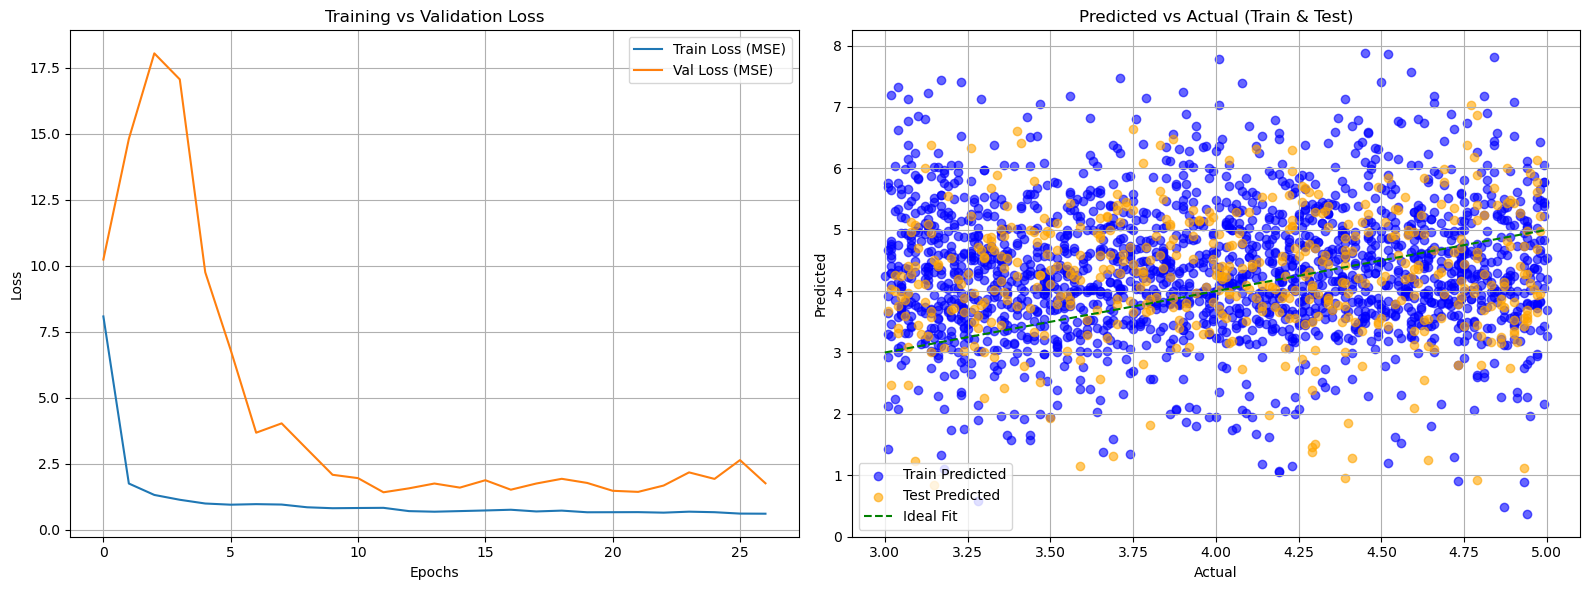

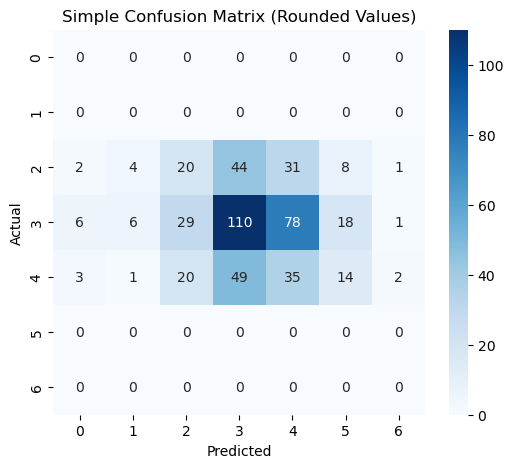

In [15]:
# ============================================
# CNN-1D Regression with TensorFlow/Keras
# Save Model (.keras) + Scaler (pickle) + Reload + Evaluate
# Train/Test Overlay Scatter + Epoch Curve
# Optimized for R², RMSE, RPD
# ============================================

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# -----------------------------
# Reproducibility
# -----------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# -----------------------------
# Load Train/Test CSV files
# -----------------------------
train_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/train_ks.csv"
test_path  = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/test_ks.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# -----------------------------
# Features and Target
# -----------------------------
target_column = "Yield"
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values
X_test  = test_df.drop(columns=[target_column]).values
y_test  = test_df[target_column].values

# -----------------------------
# Standardize Features
# -----------------------------
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

# Reshape for CNN-1D input
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled  = X_test_scaled[..., np.newaxis]

# -----------------------------
# Build 1D-CNN model
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal', input_shape=(X_train_scaled.shape[1],1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(128, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Regression output
])

# -----------------------------
# Compile Model
# -----------------------------
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -----------------------------
# EarlyStopping
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# -----------------------------
# Save Model + Scaler
# -----------------------------
model.save("CNN1D_model.keras")
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

print("\n✅ Model saved as CNN1D_model.keras")
print("✅ Scaler saved as scaler.pkl")

# -----------------------------
# Load Model + Scaler
# -----------------------------
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

X_test_scaled = loaded_scaler.transform(X_test)[..., np.newaxis]

loaded_model = load_model("CNN1D_model.keras", compile=False)
loaded_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("✅ Model loaded successfully!")

# -----------------------------
# Predictions
# -----------------------------
y_pred_train = loaded_model.predict(X_train_scaled).flatten()
y_pred_test  = loaded_model.predict(X_test_scaled).flatten()

# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    rpd  = np.std(y_true, ddof=1) / rmse
    return r2, rmse, rpd

train_r2, train_rmse, train_rpd = evaluate(y_train, y_pred_train)
test_r2, test_rmse, test_rpd    = evaluate(y_test, y_pred_test)

print("\n📊 Evaluation Results:")
print(f"Train R²   : {train_r2:.4f}")
print(f"Test R²    : {test_r2:.4f}")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test RMSE  : {test_rmse:.4f}")
print(f"Train RPD  : {train_rpd:.4f}")
print(f"Test RPD   : {test_rpd:.4f}")

# -----------------------------
# PLOTS - Combined Figure
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1️⃣ Training vs Validation Loss Curve
axes[0].plot(history.history["loss"], label="Train Loss (MSE)")
axes[0].plot(history.history["val_loss"], label="Val Loss (MSE)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training vs Validation Loss")
axes[0].legend()
axes[0].grid(True)

# 2️⃣ Scatter Plot: Train & Test Overlay
axes[1].scatter(y_train, y_pred_train, color="blue", alpha=0.6, label="Train Predicted")
axes[1].scatter(y_test, y_pred_test, color="orange", alpha=0.6, label="Test Predicted")
min_val = min(np.min(y_train), np.min(y_test))
max_val = max(np.max(y_train), np.max(y_test))
axes[1].plot([min_val, max_val], [min_val, max_val], "g--", label="Ideal Fit")
axes[1].set_title("Predicted vs Actual (Train & Test)")
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# -----------------------------
# Simple Confusion Matrix (Rounded Values)
# -----------------------------
y_test_round = np.rint(y_test).astype(int)
y_pred_round = np.rint(y_pred_test).astype(int)

cm = confusion_matrix(y_test_round, y_pred_round)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Simple Confusion Matrix (Rounded Values)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Epoch 1/30


c:\Users\Abu Jubayer\.conda\envs\tf_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 9.1787 - mae: 2.0591 - val_loss: 85.9217 - val_mae: 9.2110
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.4553 - mae: 0.9569 - val_loss: 246.3490 - val_mae: 15.6560
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.2343 - mae: 0.8753 - val_loss: 427.3831 - val_mae: 20.6223
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.1528 - mae: 0.8549 - val_loss: 554.8625 - val_mae: 23.4947
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.0426 - mae: 0.8203 - val_loss: 631.6260 - val_mae: 25.0460
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.9488 - mae: 0.7774 - val_loss: 643.9725 - val_mae: 25.2344
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.8990 - mae: 0.7586 - val_loss: 591.5618 - val_mae: 24.1158
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.8133 - mae: 0.7082 - val_loss: 469.0326 - val_mae: 21.3718
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - 

Model saved as CNN1D_model.h5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

1D-CNN Model Evaluation :
Train R²   : -2.0177
Test R²    : -3.2061
Train RMSE : 1.0140
Test RMSE  : 1.1766
Train RPD  : 0.5758
Test RPD   : 0.4881


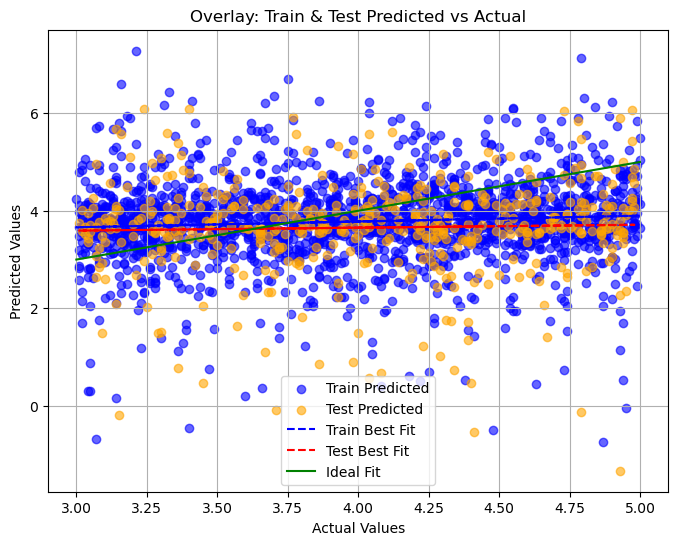

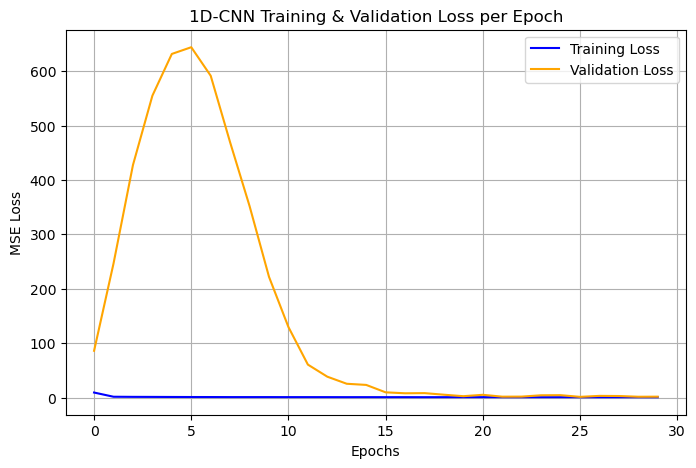

<Figure size 600x600 with 0 Axes>

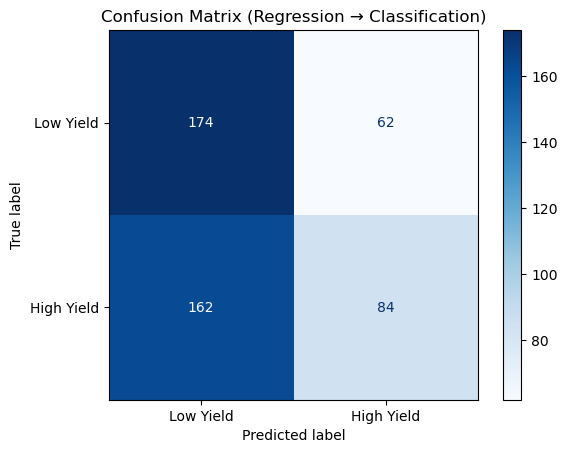

In [23]:
# -----------------------------
# CNN-1D Regression with TensorFlow/Keras (VS Code Compatible)
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load CSV files (Manually provide path)
# -----------------------------
train_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/train_ks.csv"
test_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/test_ks.csv"    

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# -----------------------------
# Features and target
# -----------------------------
target_column = "Yield"
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values
X_test = test_df.drop(columns=[target_column]).values
y_test = test_df[target_column].values

# -----------------------------
# Standardize features
# -----------------------------
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape for 1D-CNN input
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

# -----------------------------
# Build 1D-CNN model
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1],1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# -----------------------------
# Compile model
# -----------------------------
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -----------------------------
# EarlyStopping
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# -----------------------------
# Train model
# -----------------------------
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# -----------------------------
# Save model
# -----------------------------
model.save("CNN1D_model.h5")
print("Model saved as CNN1D_model.h5")

# -----------------------------
# Predictions
# -----------------------------
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# -----------------------------
# Evaluation
# -----------------------------
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true, ddof=1) / rmse
    return r2, rmse, rpd

train_r2, train_rmse, train_rpd = evaluate(y_train, y_pred_train)
test_r2, test_rmse, test_rpd = evaluate(y_test, y_pred_test)

print("\n1D-CNN Model Evaluation :")
print(f"Train R²   : {train_r2:.4f}")
print(f"Test R²    : {test_r2:.4f}")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test RMSE  : {test_rmse:.4f}")
print(f"Train RPD  : {train_rpd:.4f}")
print(f"Test RPD   : {test_rpd:.4f}")

# -----------------------------
# Overlay Scatter Plot: Train & Test
# -----------------------------
plt.figure(figsize=(8,6))

# Training set
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, label='Train Predicted')

# Test set
plt.scatter(y_test, y_pred_test, color='orange', alpha=0.6, label='Test Predicted')

# Best fit lines
z_train = np.polyfit(y_train, y_pred_train, 1)
p_train = np.poly1d(z_train)
plt.plot(y_train, p_train(y_train), "b--", label="Train Best Fit")

z_test = np.polyfit(y_test, y_pred_test, 1)
p_test = np.poly1d(z_test)
plt.plot(y_test, p_test(y_test), "r--", label="Test Best Fit")

# Ideal line
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], "g-", label="Ideal Fit")

plt.title("Overlay: Train & Test Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# -----------------------------
# Simple Epoch vs Loss Graph
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("1D-CNN Training & Validation Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


# -----------------------------
# Confusion Matrix (regression → classification)
# -----------------------------
y_test_class = (y_test >= np.median(y_test)).astype(int)
y_pred_test_class = (y_pred_test >= np.median(y_test)).astype(int)

cm = confusion_matrix(y_test_class, y_pred_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Yield", "High Yield"])
plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix (Regression → Classification)")
plt.show()


Epoch 1/30


c:\Users\Abu Jubayer\.conda\envs\tf_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 10.9476 - mae: 2.2434 - val_loss: 87.4178 - val_mae: 9.3256
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.3747 - mae: 0.9341 - val_loss: 257.0842 - val_mae: 16.0179
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.2255 - mae: 0.8784 - val_loss: 435.9411 - val_mae: 20.8634
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.1275 - mae: 0.8491 - val_loss: 548.2504 - val_mae: 23.3960
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.1065 - mae: 0.8605 - val_loss: 612.2161 - val_mae: 24.7132
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.9921 - mae: 0.8058 - val_loss: 590.7555 - val_mae: 24.2639
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.9270 - mae: 0.7707 - val_loss: 522.6483 - val_mae: 22.7999
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8862 - mae: 0.7568 - val_loss: 414.1319 - val_mae: 20.2470
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step -

Final model saved as CNN1D_final_model.h5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

1D-CNN Model Evaluation :
Train R²   : -1.1769
Test R²    : -0.9022
Train RMSE : 0.8613
Test RMSE  : 0.7913
Train RPD  : 0.6779
Test RPD   : 0.7258


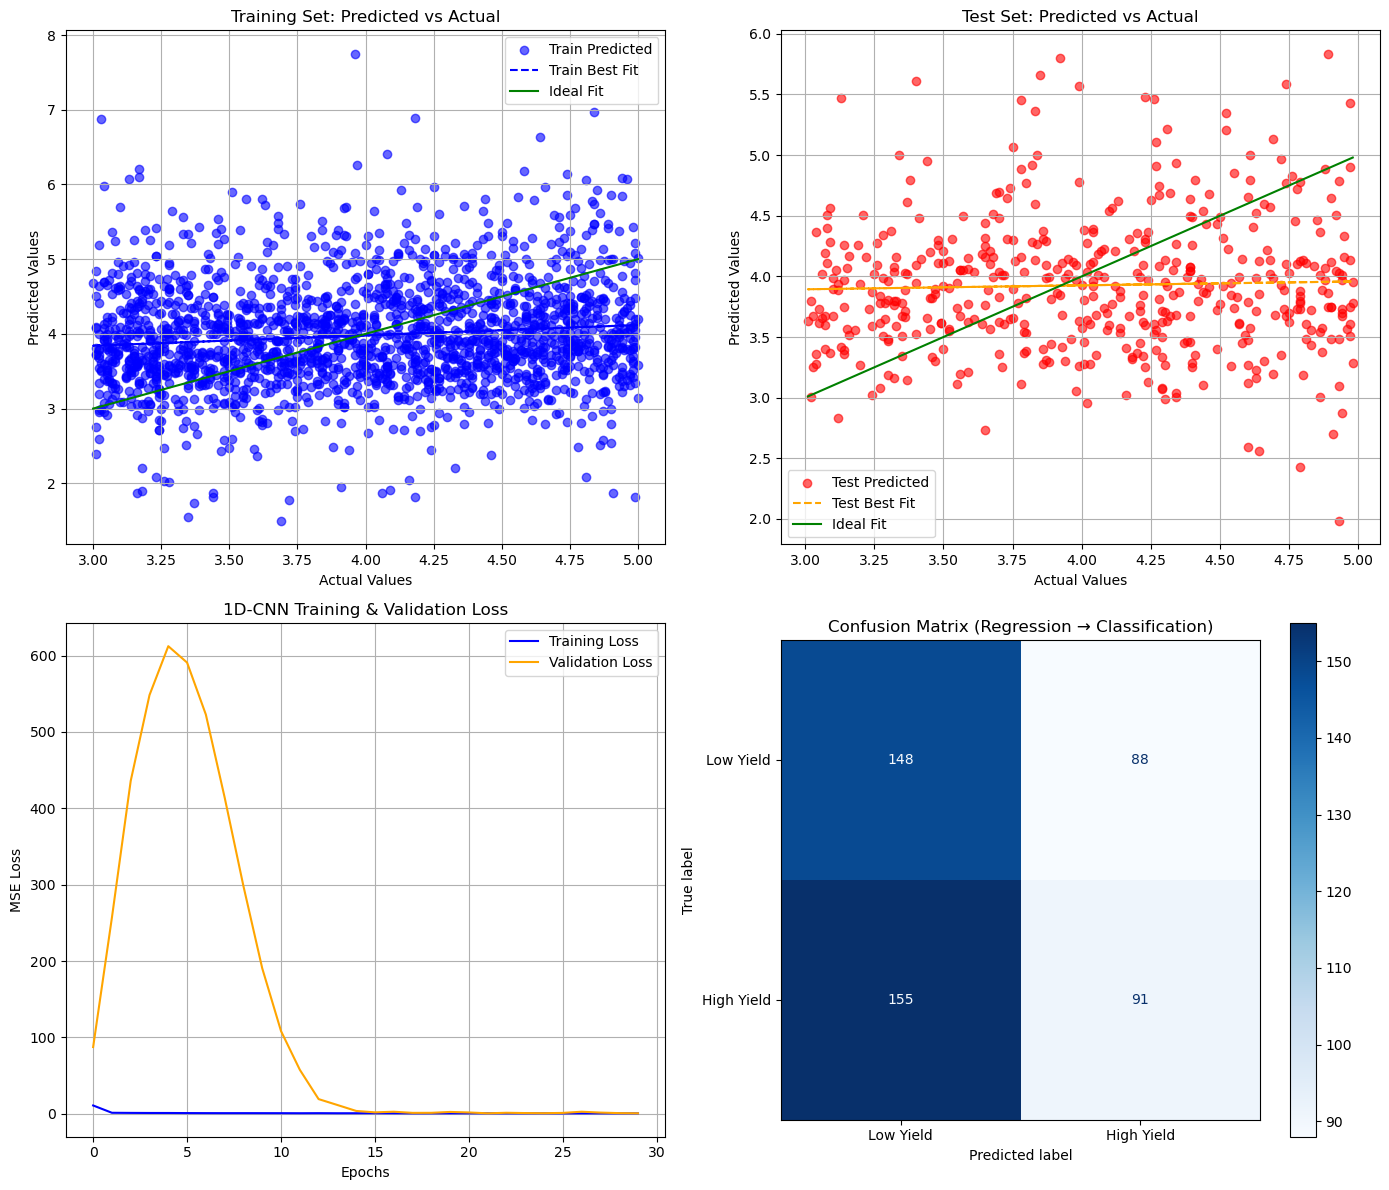

In [29]:
# -----------------------------
# CNN-1D Regression with TensorFlow/Keras (VS Code Compatible)
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# -----------------------------
# Load CSV files
# -----------------------------
train_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/train_ks.csv"
test_path = r"D:/Z Education/University/4-1 Course/Thesis/Hyper leaf dataset/test_ks.csv"    

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# -----------------------------
# Features and target
# -----------------------------
target_column = "Yield"
X_train = train_df.drop(columns=[target_column]).values
y_train = train_df[target_column].values
X_test = test_df.drop(columns=[target_column]).values
y_test = test_df[target_column].values

# -----------------------------
# Standardize features
# -----------------------------
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Save scaler for reuse
with open("scaler_X.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

# Reshape for 1D-CNN input
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

# -----------------------------
# Build 1D-CNN model
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1],1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# -----------------------------
# Compile model
# -----------------------------
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -----------------------------
# EarlyStopping
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# -----------------------------
# Train model
# -----------------------------
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# -----------------------------
# Save final model
# -----------------------------
model.save("CNN1D_final_model.h5")
print("Final model saved as CNN1D_final_model.h5")

# -----------------------------
# Predictions
# -----------------------------
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# -----------------------------
# Evaluation
# -----------------------------
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true, ddof=1) / rmse
    return r2, rmse, rpd

train_r2, train_rmse, train_rpd = evaluate(y_train, y_pred_train)
test_r2, test_rmse, test_rpd = evaluate(y_test, y_pred_test)

print("\n1D-CNN Model Evaluation :")
print(f"Train R²   : {train_r2:.4f}")
print(f"Test R²    : {test_r2:.4f}")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test RMSE  : {test_rmse:.4f}")
print(f"Train RPD  : {train_rpd:.4f}")
print(f"Test RPD   : {test_rpd:.4f}")

# -----------------------------
# 2x2 Grid Plot: Train/Test vs Actual + Training/Validation Loss + Confusion Matrix
# -----------------------------
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(14,12))

# -----------------------------
# 1. Training Set Scatter
# -----------------------------
axes[0,0].scatter(y_train, y_pred_train, color='blue', alpha=0.6, label='Train Predicted')
z_train = np.polyfit(y_train, y_pred_train, 1)
p_train = np.poly1d(z_train)
axes[0,0].plot(y_train, p_train(y_train), "blue", linestyle='--', label="Train Best Fit")
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "green", linestyle='-', label="Ideal Fit")
axes[0,0].set_title("Training Set: Predicted vs Actual")
axes[0,0].set_xlabel("Actual Values")
axes[0,0].set_ylabel("Predicted Values")
axes[0,0].legend()
axes[0,0].grid(True)

# -----------------------------
# 2. Test Set Scatter
# -----------------------------
axes[0,1].scatter(y_test, y_pred_test, color='red', alpha=0.6, label='Test Predicted')
z_test = np.polyfit(y_test, y_pred_test, 1)
p_test = np.poly1d(z_test)
axes[0,1].plot(y_test, p_test(y_test), "orange", linestyle='--', label="Test Best Fit")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "green", linestyle='-', label="Ideal Fit")
axes[0,1].set_title("Test Set: Predicted vs Actual")
axes[0,1].set_xlabel("Actual Values")
axes[0,1].set_ylabel("Predicted Values")
axes[0,1].legend()
axes[0,1].grid(True)

# -----------------------------
# 3. Training & Validation Loss
# -----------------------------
axes[1,0].plot(history.history['loss'], label='Training Loss', color='blue')
axes[1,0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
axes[1,0].set_title("1D-CNN Training & Validation Loss")
axes[1,0].set_xlabel("Epochs")
axes[1,0].set_ylabel("MSE Loss")
axes[1,0].legend()
axes[1,0].grid(True)

# -----------------------------
# 4. Confusion Matrix (Regression → Classification)
# -----------------------------
y_test_class = (y_test >= np.median(y_test)).astype(int)
y_pred_test_class = (y_pred_test >= np.median(y_test)).astype(int)
cm = confusion_matrix(y_test_class, y_pred_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Yield", "High Yield"])
disp.plot(ax=axes[1,1], cmap=plt.cm.Blues, values_format="d")
axes[1,1].set_title("Confusion Matrix (Regression → Classification)")

plt.tight_layout()
plt.show()

# -----------------------------
# Reuse saved model example
# -----------------------------
# model_loaded = load_model("CNN1D_final_model.h5")
# scaler_loaded = pickle.load(open("scaler_X.pkl", "rb"))
# Example usage:
# X_new_scaled = scaler_loaded.transform(X_new)[..., np.newaxis]
# y_new_pred = model_loaded.predict(X_new_scaled).flatten()


In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# GPU available কিনা দেখাবে
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# যদি GPU পাওয়া যায় তাহলে GPU নাম প্রিন্ট করবে
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU Detected:", gpus[0])
else:
    print("❌ No GPU detected. Check CUDA/cuDNN setup.")


TensorFlow version: 2.20.0
Num GPUs Available: 0
❌ No GPU detected. Check CUDA/cuDNN setup.


In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.20.0
GPUs: []
